# [PUBPOL190] Data Cleaning and EDA

**Estimated time:** 60-90 minutes

**Notebook developed by:** <br>
Team Lead: Skye Pickett  <br>
Module Developers: Leah Hong, Emily Guo, Reynolds Zhang <br>


### Learning Outcomes
    
In this notebook, you will learn about:
- What un-cleaned/"dirty" data looks like
- Why data cleaning matters
- Attributes of data cleaning
- Handling missing data
- Creating hypotheses
- Conducting EDA on cleaned data
- Testing hypotheses



### Table of Contents
    
1. [Introduction to Data Cleaning](#1.-Introduction-to-Data-Cleaning)
1. [Data Cleaning Techniques](#2.-Data-Cleaning-Techniques) 
1. [Introduction to the Dataset](#3.-Introduction-to-the-Dataset) 
1. [Cleaning the Dataset](#4.-Cleaning-the-Dataset)
1. [Exploratory Data Analysis](#5.-Exploratory-Data-Analysis) 
1. [Conclusion](#6.-Conclusion)
1. [Submitting Your Work](#7.-Submitting-Your-Work)
1. [Explore Data Science Opportunities](#8.-Explore-Data-Science-Opportunities)
1. [Feedback Form](#9.-Feedback-Form)

***

### Helpful Data Science Resources 
Here are some resources you can check out while doing this notebook and to explore data visualization further!
- [DATA 8 Textbook](https://inferentialthinking.com/chapters/07/Visualization.html) - Visualization chapter
- [Reference Sheet for the datascience Module](http://data8.org/sp22/python-reference.html)
- [Documentation for the datascience Modules](http://data8.org/datascience/index.html)
- [Cool Data Visualizations](https://www.tableau.com/learn/articles/best-beautiful-data-visualization-examples)
- [Statistica: Find Data on Interesting Topics](https://www.statista.com/)
- [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)


### Peer Consulting

If you find yourself having trouble with any content in this notebook, Data Peer Consultants are an excellent resource! Click [here](https://dlab.berkeley.edu/training/frontdesk-info) to locate live help.

Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook, applications of data science in the world, or other data science courses offered at Berkeley.

***
# 1. Introduction to Data Cleaning

First, let's import all the necessary packages so we can use their tools in the rest of the notebook. Run the cell below.

In [1]:
# Run this cell
import numpy as np
import pandas as pd
import folium
import ipywidgets as widgets
from IPython.display import display, HTML
from otter import Notebook
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
print("All necessary packages have been imported!")

All necessary packages have been imported!


### 1.1 What is Data Cleaning?

In this notebook, we will first focus on data cleaning. You will be given a collection of data to analyze and answer questions about. Prior to this, we need to make sure that the data is clean and ready so that we can understand the extent of our analyses found in EDA (Exploratory Data Analysis). 

>**Data cleaning** is the process of transforming raw data to improve understandability by addressing issues inside of a dataset. Through the process, we focus on the structure/format of the dataset, missing or corrupted values, unit conversion, and changing the *type* of collected values.

#### Example of Un-Cleaned Data

<img src="Data/dirty_dataset.png" alt="Dirty Dataset"/>

<font color = #d14d0f>**QUESTION 1**:</font>
**What seems wrong in the dataset pictured above? Observe issues within at least 3 different columns.**

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

#### Example: Cleaned Dataset vs Uncleaned Dataset

In [183]:
elections = Table.read_table("Data/elections.csv")
elections.show(10)

Candidate,Party,%,Year,Result
Reagan,Republican,50.7,1980,win
Carter,Democratic,41,1980,loss
Anderson,Independent,6.6,1980,loss
Reagan,Republican,58.8,1984,win
Mondale,Democratic,37.6,1984,loss
Bush,Republican,53.4,1988,win
Dukakis,Democratic,45.6,1988,loss
Clinton,Democratic,43,1992,win
Bush,Republican,37.4,1992,loss
Perot,Independent,18.9,1992,loss


The dataset `elections` is an example of a cleaned dataset that is ready for EDA. When looking at the column names and values, we see that the observations are clear and easy to manipulate for data analysis. 

Now, observe the `police_calls` dataset.

In [184]:
police_calls = Table.read_table("Data/berkeleyPDcalls.csv")
police_calls.show(10)

CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
18022300,DISTURBANCE,04/18/2018 12:00:00 AM,22:17,DISORDERLY CONDUCT,3,09/06/2018 03:30:12 AM,"OREGON STREET & MCGEE AVE Berkeley, CA (37.856572, - ...",OREGON STREET & MCGEE AVE,Berkeley,CA
18026683,THEFT MISD. (UNDER $950),05/09/2018 12:00:00 AM,21:25,LARCENY,3,09/06/2018 03:30:13 AM,"200 UNIVERSITY AVE Berkeley, CA (37.865511, -122.309967)",200 UNIVERSITY AVE,Berkeley,CA
18038550,THEFT MISD. (UNDER $950),05/18/2018 12:00:00 AM,20:00,LARCENY,5,09/06/2018 03:30:09 AM,"2200 MILVIA ST Berkeley, CA (37.868574, -122.270415)",2200 MILVIA ST,Berkeley,CA
18014810,BURGLARY AUTO,03/13/2018 12:00:00 AM,08:50,BURGLARY - VEHICLE,2,09/06/2018 03:30:08 AM,"1200 SIXTH ST Berkeley, CA (37.881142, -122.30191)",1200 SIXTH ST,Berkeley,CA
18018643,ALCOHOL OFFENSE,03/31/2018 12:00:00 AM,13:29,LIQUOR LAW VIOLATION,6,09/06/2018 03:30:11 AM,"CENTER STREET & SHATTUCK AVE Berkeley, CA (37.870308 ...",CENTER STREET & SHATTUCK AVE,Berkeley,CA
18044311,VANDALISM,08/07/2018 12:00:00 AM,10:46,VANDALISM,2,09/06/2018 03:30:10 AM,"2300 SHATTUCK AVE Berkeley, CA (37.867176, -122.267802)",2300 SHATTUCK AVE,Berkeley,CA
18090660,IDENTITY THEFT,04/04/2018 12:00:00 AM,14:00,FRAUD,3,09/06/2018 03:30:12 AM,"1000 EUCLID AVE Berkeley, CA (37.891594, -122.264883)",1000 EUCLID AVE,Berkeley,CA
18091024,THEFT MISD. (UNDER $950),06/27/2018 12:00:00 AM,13:40,LARCENY,3,09/06/2018 03:30:13 AM,"1500 HARMON ST Berkeley, CA (37.848812, -122.278043)",1500 HARMON ST,Berkeley,CA
18015688,VEHICLE STOLEN,03/17/2018 12:00:00 AM,02:00,MOTOR VEHICLE THEFT,6,09/06/2018 03:30:08 AM,"CEDAR STREET & EUCLID AVE Berkeley, CA (37.879467, - ...",CEDAR STREET & EUCLID AVE,Berkeley,CA
18029899,ASSAULT/BATTERY MISD.,05/26/2018 12:00:00 AM,07:35,ASSAULT,6,09/06/2018 03:30:13 AM,"2700 SACRAMENTO ST Berkeley, CA (37.858433, -122.280183)",2700 SACRAMENTO ST,Berkeley,CA


Looking at the column names first, users looking at the data may not know what *EVENTTTM*, *CVLEGEND*, and *CVDOW* stand for. Then looking at the column values with numerical values such as *EVENTTM* or *InDbDate*, the observation values are difficult to compute analysis with. For *EVENTTM*, looking at just the hour value may be easier for data manipulation. Another observation is that the *Block_Location* and *BLKADDR* both contain the street names which is repetitive. These are a couple of key observations that we may need to change when cleaning our dataset to be ready for EDA. 

### 1.2 Significance of Data Cleaning

When working with a dataset, we will create numerical computations to various column values to calculate important statistical values (i.e. the mean, standard deviation). Therefore, to make the column values usable, we need to manipulate them for later EDA. 

Within many datasets, there can be repetitive values or null values (i.e. NaN, blank spaces). These values can interfere with our analysis and create bias or errors. Thus, ensuring that we remove potential errors when working with data sources is significant. As a result of data cleaning, we can monitor the errors in a dataset and even see where they result from to know for future use.

Ultimately, data cleaning allows users to identify errors, duplicates, or irrelevant data within a dataset in order to map the different functions and what your data is intended to do.

***
# 2. Data Cleaning Techniques



Now, we are going to learn some data cleaning techniques; the famous titanic dataset is used for demo purpose.

In [188]:
titanic_dataset = Table.read_table("Data/titanic_dataset.csv")
titanic_dataset.show(5)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,OnboardTime
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,4/10/1912 9:42
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,-,1,0,PC 17599,71.2833,C85,C,4/10/1912 9:54
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,4/10/1912 9:55
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,na,1,0,113803,53.1,C123,S,4/10/1912 8:06
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,4/10/1912 9:10


### 2.1 Handling Missing Data

 #### What is missing data and what can it look like?
A missing value in a relational database refers to an unknown or missing value in a column. Missing values are usually represented as null values, empty strings, 0s, and NaN.

In this example, by looking at the `Age` column, we can see that it contains 3 missing values:`-`, `na` and `nan`.

In [4]:
# get the first 10 elements of the 'Age' Numpy array
titanic_dataset.column('Age')[:10] 

array(['22', '-', '26', 'na', '35', 'nan', '54', '2', 'nan', '14'],
      dtype='<U32')

In the `Pandas` library, there is a helpful function called `is_null`. In the `datascience` library (that we are using), this doesn't exist. However, in the cell below we made our own version of the "is_null" function specific to the null values present in `titanic_dataset`.
> The below cell returns whether the `Age` value for each row is null/missing.

In [14]:
is_null_array = []
for age in titanic_dataset['Age']:
    is_null_array.append(age == 'nan' or age == 'na' or age == '-')
np.array(is_null_array)

array([False,  True, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False, False,  True,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

#### Dealing with null data
Now that we have identified all null values, how are we going to deal with them as missing values? This is dependent on the context of the data. Here are a few different solutions:

#### Solution 1: Drop the observation (row) / feature (column)
If we are sure that the missing data is not useful for our EDA or that the missing data is only a small portion of the data, we can drop the rows that contain missing values. If we are confident that this feature (column) does not provide useful information for our EDA or that the percentage of missing values is high, we can drop the entire column. This is very useful when doing statistical analysis, since filling in the missing values may yield unexpected or biased results.

#### Solution 2: Impute the missing values
Imputing the missing values means that we make calculations based on the other data to fill the missing values.

For example, we can compute missing values for age with the date of birth by subtracting their birth year by the current year. This solution would be accurately imputing the values.

However, in many cases, we do not have the date of birth or an alternate representation of the data. We can then replace the missing values with the mean, median, or mode of the data.

#### When to choose the mode:
When we have categorical data, we will often choose the mode to represent missing values. We can't find the mean or median of categorical data (for example, finding the mean of 'Strawberry', 'Banana', and 'Orange' doesn't make sense).

#### Choose between mean and median: 
The **mean** is most useful when the data is not skewed because the mean is sensitive/easily influenced by outliers.

The **median** is more robust and is not sensitive to outliers. Thus when the data is skewed, we want to use the median. 

### 2.2 Understanding Column Names

In some cases, the column name may be an abbreviation, a long phrase, or a database-specific term. In these cases, we would want to replace the column names with more user-friendly names for understandability and ease during EDA.

### 2.3 Manipulating Columns

#### Dropping unnecessary columns with “drop”
We have learned `drop` in the previous notebooks. In the below cell, we dropped the column "OnboardTime".

In [39]:
titanic_dataset.drop("OnboardTime")

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,-,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,na,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,nan,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


If you wish to drop multiple columns, you may include more column names in the argument (between the parentheses) separated by a comma  (ie, `.drop("OnboardTime", "Sex")`).

If you wish to *change the actual table*, you will need to reassign the table name to the dropped table. By default, `drop` just creates a copy of the table and doesn't modify the original.

### 2.4 Mapping Table Values

Sometimes, the values of some inputs that should be unified may not be unified. Use `np.unique()` to find all unique values present in a column of the table.

In [40]:
np.unique(titanic_dataset["Sex"])

array(['female', 'male'],
      dtype='<U6')

In the example above, we found that there are “male, m, M, F, f, female, Female” values in the column `Sex`, which makes the column difficult to use. If we unify the values, it will be easier for data manipulation.

(0.0, 100.0)

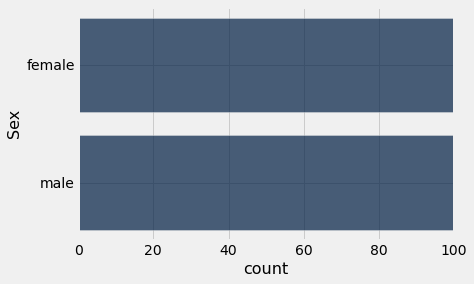

In [41]:
titanic_dataset.group("Sex").barh("Sex")
plt.xlim(0, 100)
# this is a truncated graph only showing counts up to 100

Now, what we want to do is change the input data to the two unified values (for instance, we can change all “M, m, male” to “male”). Then, we have all representations of Females as `female` and Males as `male`.

In [42]:
titanic_dataset['Sex'][titanic_dataset['Sex'] == "m"] = "male"
titanic_dataset['Sex'][titanic_dataset['Sex'] == "m "] = "male"
titanic_dataset['Sex'][titanic_dataset['Sex'] == "M"] = "male"
titanic_dataset['Sex'][titanic_dataset['Sex'] == "f"] = "female"
titanic_dataset['Sex'][titanic_dataset['Sex'] == "F"] = "female"

The indexing process done above is used to map all values to 2 categories male or female. Now we can see the only two types of values in the `Sex` column are 'female' and 'male'.

In [43]:
np.unique(titanic_dataset["Sex"])

array(['female', 'male'],
      dtype='<U6')

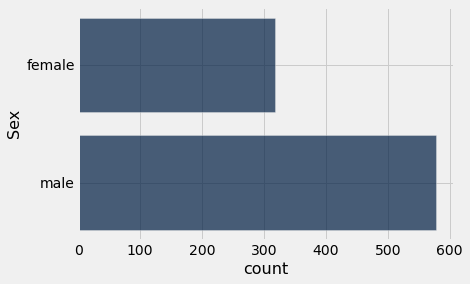

In [44]:
titanic_dataset.group("Sex").barh("Sex")

### 2.5 Using `.where`

When we want to filter data to only have what we want to look at (especially with really large data), the [`.where` function](http://data8.org/datascience/_autosummary/datascience.tables.Table.where.html?highlight=where#datascience.tables.Table.where) is useful. For example, if you have data from 1970 to 2019 but only want data after 2010, you can use `ex_table = ex_table.where("Year", are.above(2010))` to filter the data to create a table `ex_table` that only has rows where the year is greater than 2010. 

*More instructions on `.where` in Part 3 and previous notebooks.*

### 2.6 Converting Data Type

If we want to convert our data to a more suitable unit (ie, strings to numbers), you can use the `.astype()` function. Converting data can make computations such as calculating the mean, mode, or standard deviation possible. 

*More instructions in Part 3*

***
# 3. Introduction to the Dataset

We will be using data made available by the San Francisco Department of Public Health. This data outlines restaurant food safety scores for restaurants in San Francisco. We will go through the data to explore and explain what data was collected.


### 3.1 Reading in the Data

Database：[Restaurant Scores - LIVES Standard](https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i) Provided by SF Department of Public Health

The Health Department has developed an inspection report and scoring system. After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed.
The database publishes weekly and the data changes daily.

San Francisco's LIVES restaurant inspection data leverages the LIVES Flattened Schema (https://goo.gl/c3nNvr), which is based on LIVES version 2.0, cited on Yelp's website (http://www.yelp.com/healthscores).

Run the cell below to import our dataset called `bus_data`, short for "business data". *For instructional purposes, some modifications had to be done in a separate file, thus the import statement looks different this time. Don't worry about this.*

In [180]:
# Just run this cell -- don't change any code
%run Data/preclean
bus_data = Table.from_df(bus_data)
bus_data.show(10)

date,score,type,business id column,timestamp,name,address,city,state,postal_code,latitude,longitude,phone_number
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999,14154827284
08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16 00:00:00,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999,-9999,14155279839
05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20 00:00:00,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999,-9999,-9999
04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,14155300260
09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,14155300260
08/16/2019 12:00:00 AM,89,Routine - Unscheduled,100058,2019-08-16 00:00:00,SF PITA HUB,475 06TH ST,San Francisco,CA,94103,-9999,-9999,14155642006
08/15/2019 12:00:00 AM,76,Routine - Unscheduled,100059,2019-08-15 00:00:00,DUMPLING ALLEY,2512 CLEMENT ST,San Francisco,CA,94121,-9999,-9999,-9999
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,100069,2019-09-06 00:00:00,Mission Blue,144 Leland Ave,San Francisco,CA,94134,-9999,-9999,-9999
03/26/2019 12:00:00 AM,89,Routine - Unscheduled,100072,2019-03-26 00:00:00,SUBWAY SANDWICHES #7307,2375 MARKET ST,San Francisco,CA,94114,-9999,-9999,14155981866
08/27/2019 12:00:00 AM,98,Routine - Unscheduled,100079,2019-08-27 00:00:00,POSITIVE FOODS,475 06TH ST,San Francisco,CA,94103,-9999,-9999,14155397209


### 3.2 Understanding the Data

#### 3.2.1 Rows

Let's take a look at the first row of the dataset for Name_Of_Dataset using `.take()`. This function takes in a list of the indexes that you want to view the corresponding rows of. Here, we want to see the first row only, which is the row at the 0th index.

In [47]:
bus_data.take(0)

date,score,type,business id column,timestamp,name,address,city,state,postal_code,latitude,longitude,phone_number
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999,14154827284




<font color = #d14d0f>

#### Question 1:
   
   Based on the above exploration, what does each record represent?
   
   **A. "One location of a restaurant."**

**B. "A chain of restaurants."**

**C. "A city block."**


*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*


#### 3.2.2. Columns

Run the code cell below to see a list of the column names in our dataset using `.labels`.

In [48]:
bus_data.labels

('date',
 'score',
 'type',
 'business id column',
 'timestamp',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'phone_number')

The `date` and `timestamp` are representative of the time and date that of the inspection that received the score, `score`. The `type` is the type of inspection. The business ID, `address`, `city`, `state`, `postal_code`, and `phone_number` are all attributes of the restaurant location represented. The `latitude` and `longitude` represents the specific location of the restaurant.

### 3.3 Hypothesizing


Hypothesis testing is an important part of statistical analysis, where we test the assumptions made regarding a population parameter.

Generally, we compare:
* a single group with an external standard

* two or more groups with each other
    
When making hypothesis of `bus_data`, an example of comparing two or more groups with each other would be "Do businesses in the same 'postal_code' tend to have similar score? My thought is that they only need to compete with each other so they may have similar scores". This hypothesis links two columns, 'postal_code' and 'score'.
 
<font color = #d14d0f>

 #### Question 2:
   Make your own hypothesis on the 'bus_data' by comparing at two or more columns like done in the example above. *Provide a hypothetical question and a brief explanation of why you think that may be the case.*



*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*


### 3.4 Cleaning the Dataset


In the next section, we will begin to clean our dataset.


<font color = #d14d0f>
    
   #### Question 3:
   Look at our dataset and list at least 3 things that you think should be fixed/cleaned before we begin analysis.

*(See Section 2 to review common qualities of Tables that get changed during the Data Cleaning process and look at the `bus_data` Table in 3.1 and see if you notice anything that looks off.)*

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

---

# 4. Cleaning the Dataset


### 4.1 Manipulating columns


#### 4.1.1 Renaming columns

The `bus_data` table contains a column called `business id column` which  corresponds to a unique business id. However, we will rename that column to `bid` for simplicity using `Table.relabeled`.
> **`Table.relabeled(old_column_name, new_column_name)`**: Creates a new table, changing the column name specified by the old label to the new label, and leaves the original table unchanged.

In [49]:
bus_data = bus_data.relabeled("business id column", "bid")

# notice the new column name 
bus_data.show(10)

# If you ran this cell more than once, it will show an error because running it again indicates that you want to rename
# the column named "business id column" which doesn't exist anymore. This is fine to move on. You can also click "Cell"
# in the Menu, then "Run All Above", then run this cell just once.

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude,phone_number
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999,14154827284
08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16 00:00:00,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999,-9999,14155279839
05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20 00:00:00,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999,-9999,-9999
04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,14155300260
09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,14155300260
08/16/2019 12:00:00 AM,89,Routine - Unscheduled,100058,2019-08-16 00:00:00,SF PITA HUB,475 06TH ST,San Francisco,CA,94103,-9999,-9999,14155642006
08/15/2019 12:00:00 AM,76,Routine - Unscheduled,100059,2019-08-15 00:00:00,DUMPLING ALLEY,2512 CLEMENT ST,San Francisco,CA,94121,-9999,-9999,-9999
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,100069,2019-09-06 00:00:00,Mission Blue,144 Leland Ave,San Francisco,CA,94134,-9999,-9999,-9999
03/26/2019 12:00:00 AM,89,Routine - Unscheduled,100072,2019-03-26 00:00:00,SUBWAY SANDWICHES #7307,2375 MARKET ST,San Francisco,CA,94114,-9999,-9999,14155981866
08/27/2019 12:00:00 AM,98,Routine - Unscheduled,100079,2019-08-27 00:00:00,POSITIVE FOODS,475 06TH ST,San Francisco,CA,94103,-9999,-9999,14155397209


#### 4.1.2 Dropping columns

There are some missing values in phone number column (-9999) but we don't need phone numbers for our analysis so we will drop this column.

<font color = #d14d0f>

   #### Question 4:
   Replace `...` with code that drops the column that represents the phone numbers.
   >**`tablename.drop`**: remove a column from a table (takes the name of the column as the argument)



In [54]:
bus_data = ...

# see the table without the dropped column 
bus_data.show(10)

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999
08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16 00:00:00,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999,-9999
05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20 00:00:00,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999,-9999
04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999
09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999
08/16/2019 12:00:00 AM,89,Routine - Unscheduled,100058,2019-08-16 00:00:00,SF PITA HUB,475 06TH ST,San Francisco,CA,94103,-9999,-9999
08/15/2019 12:00:00 AM,76,Routine - Unscheduled,100059,2019-08-15 00:00:00,DUMPLING ALLEY,2512 CLEMENT ST,San Francisco,CA,94121,-9999,-9999
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,100069,2019-09-06 00:00:00,Mission Blue,144 Leland Ave,San Francisco,CA,94134,-9999,-9999
03/26/2019 12:00:00 AM,89,Routine - Unscheduled,100072,2019-03-26 00:00:00,SUBWAY SANDWICHES #7307,2375 MARKET ST,San Francisco,CA,94114,-9999,-9999
08/27/2019 12:00:00 AM,98,Routine - Unscheduled,100079,2019-08-27 00:00:00,POSITIVE FOODS,475 06TH ST,San Francisco,CA,94103,-9999,-9999


### 4.2 Handling missing/incorrect data: `postal_code` column

In 3.4, you may have noticed that there are a large number of potentially invalid ZIP codes. These are likely due to data entry errors.

To get a better understanding of the potential errors in the zip codes we will:

1. Import a list of valid San Francisco ZIP codes by using pd.read_json to load the sf_zipcodes.json file. This will ultimately create a series (very similar to an array) containing the valid ZIP codes.
2. Construct a Table containing only the businesses which DO NOT have valid ZIP codes.

**Step 1**


In [59]:
valid_zips = pd.read_json("Data/sf_zipcodes.json")['zip_codes']
valid_zips.values

array([94102, 94103, 94104, 94105, 94107, 94108, 94109, 94110, 94111,
       94112, 94114, 94115, 94116, 94117, 94118, 94119, 94120, 94121,
       94122, 94123, 94124, 94125, 94126, 94127, 94128, 94129, 94130,
       94131, 94132, 94133, 94134, 94137, 94139, 94140, 94141, 94142,
       94143, 94144, 94145, 94146, 94147, 94151, 94158, 94159, 94160,
       94161, 94163, 94164, 94172, 94177, 94188])

After reading the file, we use `.dtype` to see that the zip codes have been read as integers.

In [61]:
valid_zips.dtype

dtype('int64')

Similarly to what was discussed in Section 2.6, we want to ensure that the type of value *(integer, string, double, etc.)* is representative of the data.

While zip codes are numbers, they are [nominal qualitative data](https://careerfoundry.com/en/blog/data-analytics/what-is-nominal-data/#:~:text=Nominal%20data%20is%20a%20type,of%20meaningful%20order%20or%20hierarchy.). As a result, we want them to be represented as strings.


<font color = #d14d0f>
    
   #### Question 5:
   Why should zip codes be stored as strings instead of integers? (See link above for ideas.)

*Hint: We store variables as integers when we need to calculate the mean, sum, etc. of that variable. Would it make sense to do this with zip codes?*

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*


To convert the `postal_code` values, we can use the `astype` function to generate a copy with converted values. This converts the array, `valid_zips`, to strings and reassigns the variable to the same name, `valid_zips`.

In [63]:
valid_zips = valid_zips.astype("string")

Now we'll use the same code as above to check what type the values are now.

In [64]:
valid_zips.dtype

string[python]

**Step 2**

Here we will use the `np.isin` function. More details about this function are in its [documentation](https://numpy.org/doc/stable/reference/generated/numpy.isin.html).

**What is an Array?**

Remember that the type of `bus_data` is a Table. Every column in a table is an array. For example, the column `bid` is an array and so is the column `name`. Every column is an array regardless of what kind of data it contains.

In [65]:
# these are the names of the columns in bus_data
bus_data.labels

('date',
 'score',
 'type',
 'bid',
 'timestamp',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude')

We can see in the cell below that the type of the `bid` column is an array.

In [66]:
type(bus_data.column('bid'))

numpy.ndarray

Try replacing the `...` in the cell below with another column name to see that *every column* is an array!

In [ ]:
type(bus_data.column(...))

Now we know that every column is an Array. Thus `np.isin` can be applied to any column.

Let's assign the array of the `postal_code` column values to a variable called `zip_code_array`.

In [67]:
zip_code_array = bus_data.column('postal_code')
zip_code_array

array(['94133', '94103', '94121', ..., '94110', '94108', '94108'],
      dtype='<U10')


<font color = #d14d0f>
    
   #### Question 6:
   Fill in the cell below so that is_valid_zip will return True when the zipcode in postal_code column is a valid zipcode, based on `valid_zips`, and False otherwise.

> **`np.isin(your_array, test_array)`**: returns True and False for every value in `your_array` indicating whether or not that value "is in" the `test_array`.


In [71]:
is_valid_zip = np.isin(..., ...)
is_valid_zip

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

Let's add a column to our `bus_data` table with this array to more obviously indicate which rows have invalid postal codes.

In [70]:
bus_data = bus_data.with_column('is_valid_zip', is_valid_zip)
bus_data.show(10)

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude,is_valid_zip
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999,True
08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16 00:00:00,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999,-9999,True
05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20 00:00:00,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999,-9999,True
04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
08/16/2019 12:00:00 AM,89,Routine - Unscheduled,100058,2019-08-16 00:00:00,SF PITA HUB,475 06TH ST,San Francisco,CA,94103,-9999,-9999,True
08/15/2019 12:00:00 AM,76,Routine - Unscheduled,100059,2019-08-15 00:00:00,DUMPLING ALLEY,2512 CLEMENT ST,San Francisco,CA,94121,-9999,-9999,True
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,100069,2019-09-06 00:00:00,Mission Blue,144 Leland Ave,San Francisco,CA,94134,-9999,-9999,True
03/26/2019 12:00:00 AM,89,Routine - Unscheduled,100072,2019-03-26 00:00:00,SUBWAY SANDWICHES #7307,2375 MARKET ST,San Francisco,CA,94114,-9999,-9999,True
08/27/2019 12:00:00 AM,98,Routine - Unscheduled,100079,2019-08-27 00:00:00,POSITIVE FOODS,475 06TH ST,San Francisco,CA,94103,-9999,-9999,True


### 4.4 Filtering data


Let's view the rows in `bus_data` that have **invalid zip codes**.

<font color = #d14d0f>
    
   #### Question 7:
   Replace `...` with `True` or `False`. (Be sure to put **True** or **False** without quotations (ie, not "True" or "False")).

In [72]:
incorrect_postal_codes = bus_data.where('is_valid_zip', ...)
incorrect_postal_codes

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude,is_valid_zip
04/03/2019 12:00:00 AM,85,Routine - Unscheduled,100126,2019-04-03 00:00:00,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999,-9999,False
08/16/2019 12:00:00 AM,98,Routine - Unscheduled,100660,2019-08-16 00:00:00,TEAPENTER,1518 IRVING ST,San Francisco,CA,94122-1909,-9999,-9999,False
04/25/2019 12:00:00 AM,92,Routine - Unscheduled,100781,2019-04-25 00:00:00,LE CAFE DU SOLEIL,200 FILLMORE ST,San Francisco,CA,94117-3504,-9999,-9999,False
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,101129,2019-09-06 00:00:00,Vendor Room 200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999,-9999,False
08/14/2017 12:00:00 AM,75,Routine - Unscheduled,10227,2017-08-14 00:00:00,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.7526,-122.416,False
03/07/2018 12:00:00 AM,83,Routine - Unscheduled,10227,2018-03-07 00:00:00,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.7526,-122.416,False
03/30/2017 12:00:00 AM,100,Routine - Unscheduled,10372,2017-03-30 00:00:00,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,-9999,37.7391,-122.416,False
10/24/2017 12:00:00 AM,100,Routine - Unscheduled,10372,2017-10-24 00:00:00,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,-9999,37.7391,-122.416,False
02/26/2018 12:00:00 AM,100,Routine - Unscheduled,10372,2018-02-26 00:00:00,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,-9999,37.7391,-122.416,False
04/04/2019 12:00:00 AM,100,Routine - Unscheduled,10372,2019-04-04 00:00:00,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,-9999,37.7391,-122.416,False


Look at the postal_code column above. We can notice 2 main patterns:
1. Many of these incorrect postal codes are `-9999`. 
2. Some other incorrect postal codes are incorrect because they give a postal code range, rather than a single code. (ie, `94105-1420` instead of `94105`)


<br>

**The remainder of Section 4 is a walkthrough of how to clean the `postal_code` column. Read through this process for understanding and practice.**

#### 4.4.1 Investigating `-9999` Postal Codes
We've investigated the 1st pattern below. Read through this process and formulate an opinion on why these restaurant locations might have incorrect/missing information.

In [74]:
code_neg9999 = incorrect_postal_codes.where('postal_code', '-9999')
code_neg9999.show(5)

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude,is_valid_zip
04/03/2019 12:00:00 AM,85,Routine - Unscheduled,100126,2019-04-03 00:00:00,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999,-9999,False
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,101129,2019-09-06 00:00:00,Vendor Room 200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999,-9999,False
08/14/2017 12:00:00 AM,75,Routine - Unscheduled,10227,2017-08-14 00:00:00,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.7526,-122.416,False
03/07/2018 12:00:00 AM,83,Routine - Unscheduled,10227,2018-03-07 00:00:00,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.7526,-122.416,False
03/30/2017 12:00:00 AM,100,Routine - Unscheduled,10372,2017-03-30 00:00:00,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,-9999,37.7391,-122.416,False


This shows us that there are 357 rows that have the incorrect postal_code `-9999`. Let's look at some of the locations (`address` column) of the restaurants that correspond to these values.

We will now use `.group` (as we did in Section 4 of the "Exploring Labor Statistics Among US Youth" Notebook). Here we group the table of restaurants with postal codes, -9999, by `address`. Count represents how many times that address is present in the notebook.

In [85]:
code_neg9999.group("address").sort("count", descending = True)

address,count
Off The Grid,53
Off the Grid,19
Approved Private Locations,8
450 Church St,6
Approved Locations,6
10 29th St,5
1717 Harrison St,5
1801 Vicente St,5
2277 Shafter Ave,5
3435 Mission St,5


This shows that there are 53 store locations that have addresses marked as "Off The Grid", 19 with addresses "Off the Grid", and 3 with addresses "OTG". These qualify as missing values for our data. Thus, will want to remove these rows from our `bus_data` table.

We will do this after we address the second pattern.

#### 4.4.2 Investigating Postal Code Ranges


Next, let's look at the 2nd pattern (where zip code ranges are listed rather than individual zip codes). We actually ***can*** fix this so we won't need to drop any of these values!

Every proper zip code is 5 digits long (ie, 94103). To turn the ranges into only a single zip code, we will use `str.slice` to "trim" the string. Remember that the `postal_code` column is made up of [strings](https://press.rebus.community/programmingfundamentals/chapter/string-data-type/) rather than integers. We use the code `str.slice(0,5)` to mean take a slice of the string from the 0th index up to the 5th index. This returns the 1st through 5th characters, which results in `94123-3106` turning into `94123`. For values that were already 5 digits long, this slice returns itself so nothing changes (ie, `94103` is still `94103`). *This can only be done on a Series (similar to an array) so we used pd.Series to temporarily convert the array of values to a series of values in the below line of code.*

In [86]:
bus_data = bus_data.with_column('postal_code', pd.Series(bus_data.column('postal_code')).str.slice(0,5))
bus_data
# notice now all postal codes are 5 digits

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude,is_valid_zip
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999,True
08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16 00:00:00,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999,-9999,True
05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20 00:00:00,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999,-9999,True
04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
08/16/2019 12:00:00 AM,89,Routine - Unscheduled,100058,2019-08-16 00:00:00,SF PITA HUB,475 06TH ST,San Francisco,CA,94103,-9999,-9999,True
08/15/2019 12:00:00 AM,76,Routine - Unscheduled,100059,2019-08-15 00:00:00,DUMPLING ALLEY,2512 CLEMENT ST,San Francisco,CA,94121,-9999,-9999,True
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,100069,2019-09-06 00:00:00,Mission Blue,144 Leland Ave,San Francisco,CA,94134,-9999,-9999,True
03/26/2019 12:00:00 AM,89,Routine - Unscheduled,100072,2019-03-26 00:00:00,SUBWAY SANDWICHES #7307,2375 MARKET ST,San Francisco,CA,94114,-9999,-9999,True
08/27/2019 12:00:00 AM,98,Routine - Unscheduled,100079,2019-08-27 00:00:00,POSITIVE FOODS,475 06TH ST,San Francisco,CA,94103,-9999,-9999,True


#### 4.4.3 Dropping Rows

Now that we've fixed postal code ranges, let's drop the values that are not valid postal codes. We do this by filtering our data. 

*The line of code translates to:*
> "The `bus_data` table now will be a table with only the rows in the `bus_data` table where `postal_code` was in the list of valid zipcodes (`valid_zips`)".

In [88]:
bus_data = bus_data.where('is_valid_zip', True)
bus_data.show(5)

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude,is_valid_zip
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999,True
08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16 00:00:00,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999,-9999,True
05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20 00:00:00,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999,-9999,True
04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True


***
# 5. Exploratory Data Analysis

Exploratory Data Analysis allows you to "get to know the data". 

EDA is the process of transforming, visualizing, and summarizing data to:
* build / confirm understanding of the data and its provenance
* identify and address potential issues in the data
* inform the subsequent analysis 
* discover potential hypothesis 

EDA ia an open-ended analysis that allows us to be willing to find something surprising.

### 5.1 Plotting distribution of inspection scores


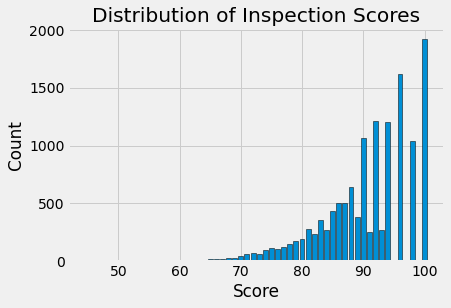

In [94]:
scoregrouped = bus_data.group("score")
plt.figure()
plt.bar(scoregrouped.column("score"), scoregrouped.column("count"), edgecolor = 'black')
plt.title('Distribution of Inspection Scores')
plt.xlabel('Score');
plt.ylabel('Count');

You can see that the distribution is not symmetric: the scores extend to the left farther than they do to the right. The distribution is therefore said to be left-skewed.

### 5.2 Data Exploration


**5.2.1 Using `.group`**

<font color = #d14d0f>
    
   #### Question 8:

What is the average score for each unique business id?

*Hint: the function for average is `np.mean`.*
> `tablename.group(column_name(s), func)`: Group rows by unique values or combinations of values in a column(s). Multiple columns must be entered in array or list form. Other values aggregated by count (default) or optional argument func.

In [108]:
bus_data.group(..., ...).select('bid', 'score mean')

bid,date mean,score mean,type mean,timestamp mean,name mean,address mean,city mean,state mean,postal_code mean,latitude mean,longitude mean,is_valid_zip mean
19,,95,,None,,,,,,37.7868,-122.422,1
24,,98,,None,,,,,,37.7929,-122.403,1
31,,95,,None,,,,,,37.8072,-122.419,1
45,,88.25,,None,,,,,,37.7471,-122.414,1
48,,90.5,,None,,,,,,37.764,-122.466,1
54,,90.5,,None,,,,,,37.7846,-122.438,1
58,,75.6667,,None,,,,,,37.7945,-122.397,1
61,,95.3333,,None,,,,,,37.8082,-122.41,1
66,,97.3333,,None,,,,,,37.7636,-122.477,1
73,,86,,None,,,,,,37.7889,-122.434,1


**5.2.2 Mean score**


<font color = #d14d0f>
    
   #### Question 9:

What is the mean of all of the scores?

*Hint: Use `np.mean` on the column that represents the scores.*

In [109]:
np.mean(...)

90.588036697247702

**5.2.3 Median score**


<font color = #d14d0f>
    
   #### Question 10:
   What is the median of all of the scores?

*Hint: Use `np.median` on the column that represents the scores.*

In [107]:
...

92.0

**5.2.4 Distribution of the score column**

The `stats.describe` function computes several descriptive statistics of the array that is passed in, including ones we calculated above. (Remember that a column is an array so `bus_data.column('score')` is an array.)

In [110]:
from scipy import stats
stats.describe(bus_data.column('score'))

DescribeResult(nobs=13625, minmax=(45, 100), mean=90.588036697247702, variance=58.48566133159509, skewness=-1.0049349602871454, kurtosis=1.1746951455912606)


<font color = #d14d0f>
    
   #### Question 11:
   What is the skewness for the score column (as found by the above cell)? Why is it negative?

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

**5.2.5 Filtering unwanted outliers**

Let's filter out any negative score values. These are clearly errors because the lowest score you can receive is 0 out of 100. 


<font color = #d14d0f>
    
   #### Question 12:
   Fill in `...` with code to ensure that only rows with non-negative score values are shown. *Write the number as an integer, not a string or float.*

In [114]:
bus_data = bus_data.where('score', are.above_or_equal_to(...))
bus_data.show(10)

date,score,type,bid,timestamp,name,address,city,state,postal_code,latitude,longitude,is_valid_zip
04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03 00:00:00,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999,-9999,True
08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16 00:00:00,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999,-9999,True
05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20 00:00:00,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999,-9999,True
04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12 00:00:00,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999,-9999,True
08/16/2019 12:00:00 AM,89,Routine - Unscheduled,100058,2019-08-16 00:00:00,SF PITA HUB,475 06TH ST,San Francisco,CA,94103,-9999,-9999,True
08/15/2019 12:00:00 AM,76,Routine - Unscheduled,100059,2019-08-15 00:00:00,DUMPLING ALLEY,2512 CLEMENT ST,San Francisco,CA,94121,-9999,-9999,True
09/06/2019 12:00:00 AM,100,Routine - Unscheduled,100069,2019-09-06 00:00:00,Mission Blue,144 Leland Ave,San Francisco,CA,94134,-9999,-9999,True
03/26/2019 12:00:00 AM,89,Routine - Unscheduled,100072,2019-03-26 00:00:00,SUBWAY SANDWICHES #7307,2375 MARKET ST,San Francisco,CA,94114,-9999,-9999,True
08/27/2019 12:00:00 AM,98,Routine - Unscheduled,100079,2019-08-27 00:00:00,POSITIVE FOODS,475 06TH ST,San Francisco,CA,94103,-9999,-9999,True


### 5.3 Your Turn: Analyze the Data


We will provide an example here, then you will repeat the process two times below. Look back at your **hypothesis** to see what variables/columns you will want to focus on analyzing.


#### Example Analysis

**Example hypothesis:** "Did the businesses that were inspected multiple times have worse scores on average than those that were inspected only once? My thought is that if they needed to be inspected multiple times, they may have started with a lower score."

We want to find how many times each business (or business ID / "bid") was inspected so we group by "bid". Remember if `.group` has no displayed function, the default is "count". 

> `tablename.group(columnname, func)`

In [151]:
bus_data.group('bid')

bid,count
19,2
24,3
31,2
45,4
48,2
54,2
58,3
61,3
66,3
73,3


Now I'll use `.where` to separate the businesses with 1 inspection and with more than 1 inspection. I assigned these to the variables `multiple_insp` and `one_insp`.

In [152]:
multiple_insp = bus_data.group('bid').where("count", are.above(1))
multiple_insp.show(3)

bid,count
19,2
24,3
31,2


In [153]:
one_insp = bus_data.group('bid').where("count", 1)
one_insp.show(3)

bid,count
151,1
192,1
200,1


Now I want to find the mean of both categories and compare!

In [159]:
multiple_insp_mean = np.mean(multiple_insp.column("count"))
multiple_insp_mean

2.8747685185185183

In [160]:
one_insp_mean = np.mean(one_insp.column("count"))
one_insp_mean

1.0

My hypothesis was that the mean of the scores of businesses that were inspected multiple times would be *lower* than those that were inspected just *once*. You can just compare the cells above or run the cell below to see if my hypothesis was correct.

In [161]:
multiple_insp_mean < one_insp_mean

False

This shows that my hypothesis was **incorrect**! That's okay! We create hypotheses to learn more about the data.

#### Your turn!

#### Rewrite your hypothesis here:


*Double-click to edit this cell and replace this text with your hypothesis.*

#### Use the below code cell to analyze your hypothesis.
Feel free to use the example analysis code as inspiration. Your written conclusions will be done in part 6; this is just the analysis. Remember you can add more cells with the `+`. If it makes sense for your hypothesis, try making a visualization! Here is the [Python datascience library reference sheet](http://data8.org/sp22/python-reference.html).

In [138]:
# Use this cell to code the answer your hypothesis

In [ ]:
# Use this cell to code the answer your hypothesis

In [ ]:
# Use this cell to code the answer your hypothesis

***
# 6. Conclusion 

**Validating the Data**

<font color = #d14d0f>
    
   #### Question 13:
  Does the data align with your expectations?

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

<font color = #d14d0f>
    
   #### Question 14:
   Does the data prove or disprove your hypothesis? Does it bring you any insight?

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

<font color = #d14d0f>
    
   #### Question 15:
    
  Did you find another trend that can help you formulate another hypothesis?

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

<br>Over the course of this notebook, you took a deeper dive into data cleaning and conducted your own exploratory data analysis. You learned the importance of data cleaning and what should be handled *before* conducting analysis. Now you're prepared to apply these techniques to your own survey! 

### Congratulations! You have finished the notebook! ##

***
# 7. Submitting Your Work 


**Make sure that you've answered all the questions.**

Follow these steps: 
1. Go to `File` in the menu bar, then select `Save and Checkpoint` (or click CTRL+S).
2. Go to `Cell` in the menu bar, then select `Run All`.
3. Click the link produced by the code cell below.
4. Submit the downloaded PDF on bCourses according to your professor's instructions.

**Note:** If clicking the link below doesn't work for you, don't worry! Simply click `File` in the menu, find `Download As`, and choose `PDF via LaTeX (.pdf)` to save a copy of your pdf onto your computer.

**Check the PDF before submitting and make sure all of your answers and any changes are shown.**

In [52]:
#This may take a few extra seconds.
from otter.export import export_notebook
from IPython.display import display, HTML
export_notebook("Data Cleaning EDA Notebook.ipynb", filtering=True, pagebreaks=False)
display(HTML("<p style='font-size:20px'> <br>Save this notebook, then click <a href='Data Cleaning EDA Notebook.pdf' download>here</a> to open the pdf.<br></p>"))

FileNotFoundError: [Errno 2] No such file or directory: 'Notebook1.ipynb'

***
# 8. Explore Data Science Opportunities

Interested in learning more about how to get involved in data science or learn about data science applications in your field of study? The following resources might help support your learning:

- Data Science Modules: http://data.berkeley.edu/education/modules
- Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings
- Data 8 Course Information: http://data8.org/
- Data 100 Course Information: https://ds100.org/


***
# 9. Feedback Form  <a id='8'></a>

<div class="alert alert-info">
<b> We encourage students to fill out the following feedback form to share your experience with this Module notebook. This feedback form will take no longer than 5 minutes. At UC Berkeley Data Science Undergraduate Studies Modules, we appreciate all feedback to improve the learning of students and experience utilizing Jupyter Notebooks for Data Science Education: </b> 
</div>

# [UC Berkeley Data Science Feedback Form](https://forms.gle/hipxf2uFw5Ud4Hyn8)